In [34]:
import numpy as np
import astropy.units as u
import astropy.constants as c
from matplotlib import pyplot as plt

In [5]:
(18.56 * 1e-3 * u.dyne / u.angstrom).to(u.N / u.m)

<Quantity 1856. N / m>

In [29]:
reduced_mass = (12*c.m_p * 16*c.m_p) / (12*c.m_p + 16*c.m_p)
force_constant = 1856 * u.N / u.m
vib_freq = 1 / (2 * np.pi) * np.sqrt(force_constant / reduced_mass)

vib_energy = (c.h * vib_freq).to(u.eV)
vib_wv = (c.h * c.c / vib_energy).to(u.micron)

In [31]:
vib_energy, vib_wv

(<Quantity 0.26477944 eV>, <Quantity 4.68254626 micron>)

In [107]:
bond_len = 0.1128 * u.nm
B_rotational = (c.h / (8 * np.pi**2 * reduced_mass * bond_len**2))
deltaE = (2 * c.h * B_rotational).to(u.eV)
deltaE

<Quantity 0.00047564 eV>

In [32]:
def parse_csv_file(filename, xunit, yunit):
    data = np.loadtxt(filename, delimiter=',', usecols=(0,1))
    return np.sort(data[:,0]) * xunit, data[:,1][np.argsort(data[:,0])] * yunit

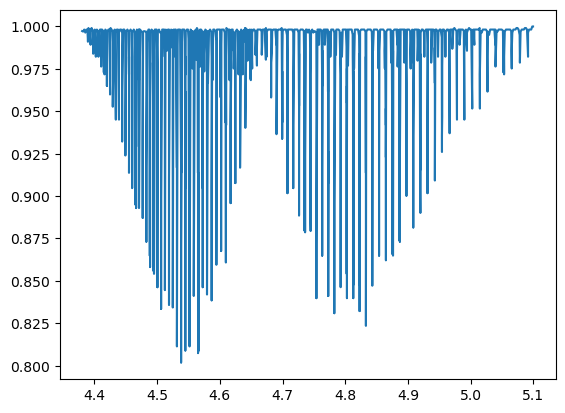

In [48]:
CO_wvs, CO_flux = \
    parse_csv_file("./template_spectra/K_CO.csv", u.micron, u.erg/u.s/u.cm**2/u.micron)
lower_bound = 4.38 * u.micron
upper_bound = 5.1 * u.micron
CO_flux_corrected = (np.min(CO_flux) / CO_flux)
CO_wvs, CO_flux = CO_wvs[CO_wvs > lower_bound], CO_flux_corrected[CO_wvs > lower_bound]
CO_wvs, CO_flux = CO_wvs[CO_wvs < upper_bound], CO_flux[CO_wvs < upper_bound]
plt.figure()
plt.plot(CO_wvs, CO_flux)
plt.show()

In [49]:
def parse_csv_file(filename, xunit, yunit):
    data = np.loadtxt(filename, delimiter=',', usecols=(0,1))
    return np.sort(data[:,0]) * xunit, data[:,1][np.argsort(data[:,0])] * yunit

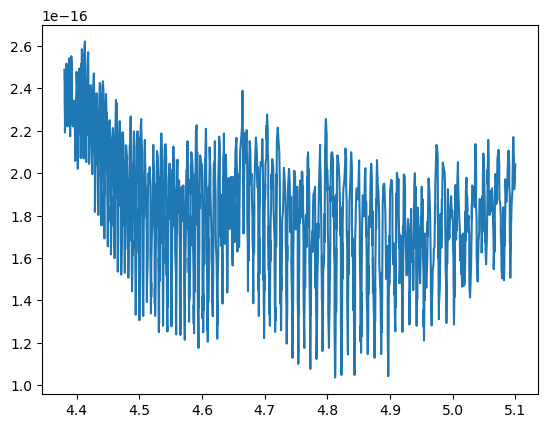

In [76]:
jwst_wvs, jwst_flux = \
    parse_csv_file("./measurements/jwstCO.csv", u.micron, u.Unit('W m-2 micron-1'))
jwst_flux, jwst_wvs = jwst_flux[jwst_wvs > lower_bound], jwst_wvs[jwst_wvs > lower_bound]
jwst_flux, jwst_wvs = jwst_flux[jwst_wvs < upper_bound], jwst_wvs[jwst_wvs < upper_bound]
plt.figure()
plt.plot(jwst_wvs, jwst_flux)
plt.show()

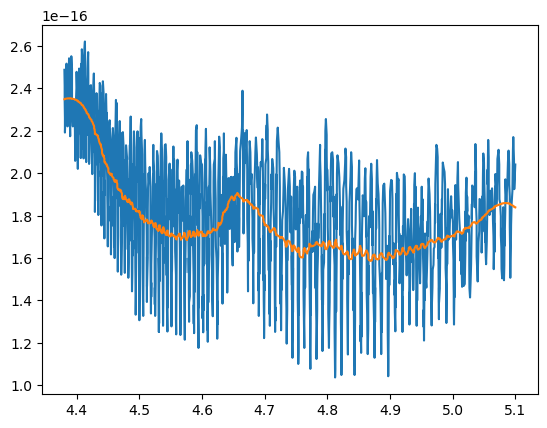

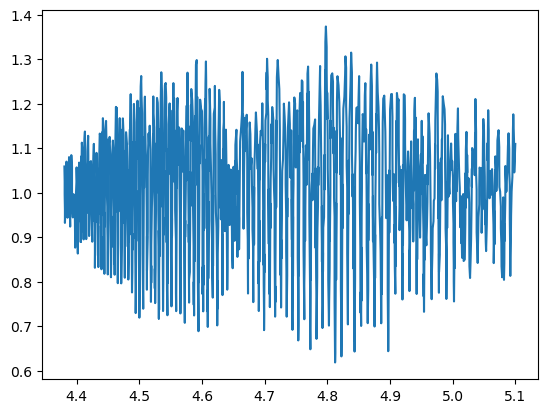

In [101]:
# divide data by continuum
from scipy.signal import savgol_filter
jwst_cont = savgol_filter(jwst_flux, 201, 3)
plt.figure()
plt.plot(jwst_wvs, jwst_flux)
plt.plot(jwst_wvs, jwst_cont)
plt.show()
plt.figure()
jwst_features = jwst_flux/jwst_cont
plt.plot(jwst_wvs, jwst_features)
plt.show()

In [127]:
num_levels = 40
energy_levels = vib_energy + np.arange(-num_levels, num_levels+1) * deltaE
transition_wvs_simple = (c.h * c.c / (energy_levels[::-1])).to(u.micron)
transition_wvs_simple

<Quantity [4.36863679, 4.37597072, 4.38332932, 4.3907127 , 4.398121  ,
           4.40555434, 4.41301286, 4.42049666, 4.4280059 , 4.43554069,
           4.44310117, 4.45068746, 4.45829971, 4.46593804, 4.47360258,
           4.48129348, 4.48901087, 4.49675489, 4.50452567, 4.51232336,
           4.52014808, 4.528     , 4.53587924, 4.54378595, 4.55172027,
           4.55968235, 4.56767233, 4.57569037, 4.5837366 , 4.59181119,
           4.59991427, 4.608046  , 4.61620653, 4.62439602, 4.63261461,
           4.64086247, 4.64913975, 4.65744661, 4.66578321, 4.6741497 ,
           4.68254626, 4.69097303, 4.69943019, 4.7079179 , 4.71643633,
           4.72498563, 4.73356599, 4.74217757, 4.75082053, 4.75949506,
           4.76820133, 4.7769395 , 4.78570976, 4.79451229, 4.80334725,
           4.81221484, 4.82111523, 4.8300486 , 4.83901514, 4.84801503,
           4.85704846, 4.86611562, 4.8752167 , 4.88435188, 4.89352137,
           4.90272534, 4.91196401, 4.92123755, 4.93054618, 4.93989009,
      

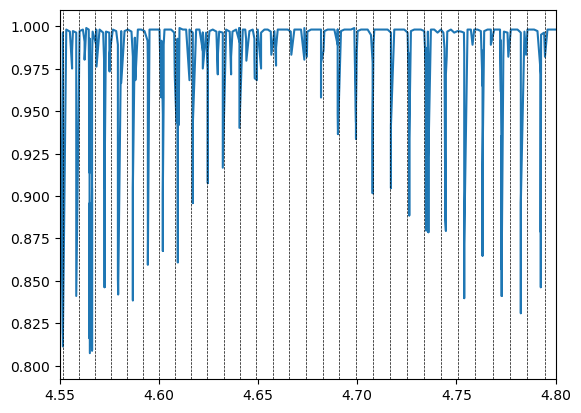

In [131]:
plt.figure()
plt.plot(CO_wvs, CO_flux)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.8])
plt.show()

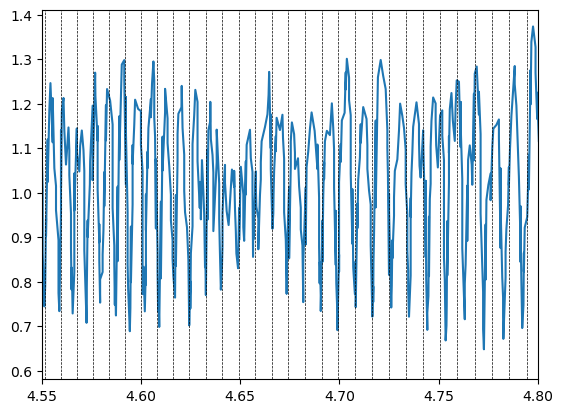

In [132]:
plt.figure()
plt.plot(jwst_wvs, jwst_features)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.8])
plt.show()

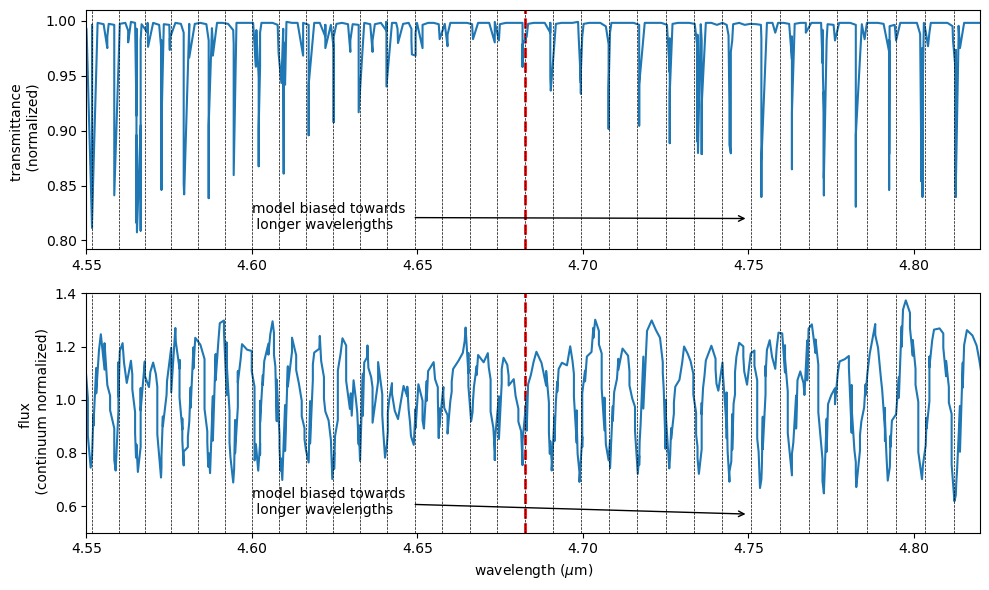

In [161]:
# plot subfigures top and bottom and long and short
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(CO_wvs, CO_flux)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.annotate('model biased towards \n longer wavelengths',
                xy=(4.75, 0.82), xycoords='data',
                xytext=(4.6, 0.81), textcoords='data',
                arrowprops=dict(arrowstyle="->"))
plt.ylabel("transmittance \n (normalized)")

plt.subplot(2, 1, 2)
plt.axvline(vib_wv.value, linewidth=2, color='red', linestyle='--')
plt.plot(jwst_wvs, jwst_features)
for transition_wv in transition_wvs_simple:
    plt.axvline(transition_wv.value, linewidth=0.5, color='k', linestyle='--')
plt.xlim([4.55, 4.82])
plt.ylim([0.5, 1.4])
plt.annotate('model biased towards \n longer wavelengths',
                xy=(4.75, 0.57), xycoords='data',
                xytext=(4.6, 0.57), textcoords='data',
                arrowprops=dict(arrowstyle="->"))
plt.xlabel("wavelength ($\mu$m)")
plt.ylabel("flux \n (continuum normalized)")
plt.tight_layout()
plt.savefig("plots/CO_vib_simple.png", dpi=300)
plt.show()

In [140]:
vib_energy

<Quantity 0.26477944 eV>